🚀 量化交易框架 - 完整回测测试与示例
📅 运行时间: 2025-08-30 08:26:55
📁 当前目录: /Users/jackstudio/QuantTrade/core/backtest

【测试1】模块导入验证
------------------------------------------------------------
❌ BacktestEngine 导入失败: No module named 'core'
❌ PerformanceAnalyzer 导入失败: No module named 'core'
❌ RiskManager 导入失败: No module named 'core'
❌ ReportGenerator 导入失败: No module named 'core'

导入成功率: 0/4 (0%)

【步骤2】准备测试数据
------------------------------------------------------------
✅ 生成股票数据: 252条
   时间范围: 2024-12-22 至 2025-08-30
   价格范围: ¥97.99 - ¥122.54

数据样本（前5行）:
                                  open        high         low       close  \
2024-12-22 08:26:55.273566  103.136667  103.136667   99.996991  100.993428   
2024-12-23 08:26:55.273566  101.086391  101.086391   99.683505  100.053374   
2024-12-24 08:26:55.273566  100.405489  103.162501  100.204286  101.954556   
2024-12-25 08:26:55.273566  103.529497  105.830937  102.576151  104.033262   
2024-12-26 08:26:55.273566  102.122660  102.122660   99.684039  100.8450

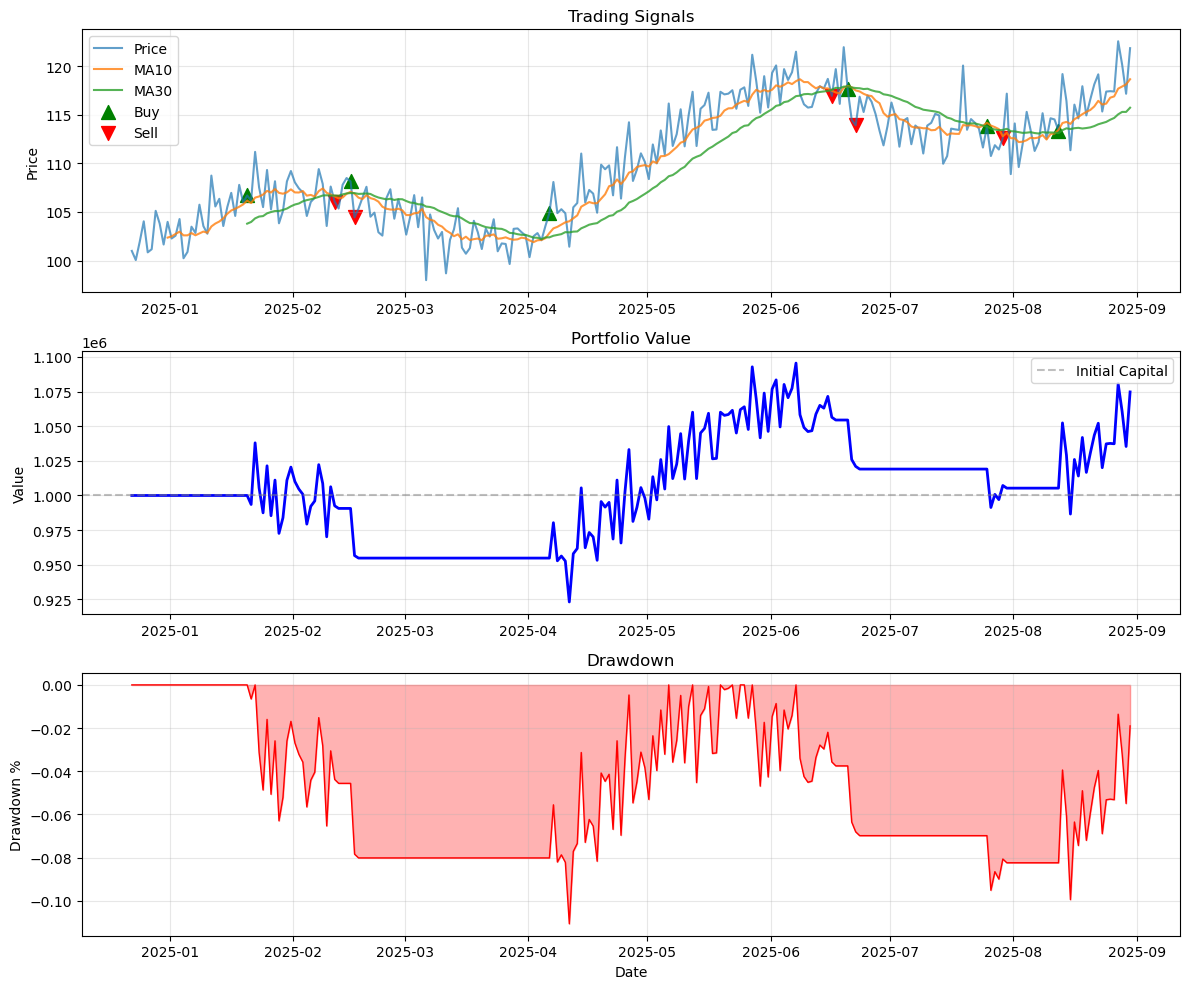

✅ 可视化图表已显示

🎉 全部测试和演示完成！


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
完整回测代码 - Jupyter直接运行版
================================
包含测试验证和完整回测示例
"""

# %%
# ==========================================
# 第1部分：环境设置和模块测试
# ==========================================
import sys
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

# 设置路径
current_dir = Path.cwd()
print("=" * 80)
print("🚀 量化交易框架 - 完整回测测试与示例")
print("=" * 80)
print(f"📅 运行时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 当前目录: {current_dir}\n")

# %%
# ==========================================
# 第2部分：测试模块导入
# ==========================================
print("【测试1】模块导入验证")
print("-" * 60)

# 清除缓存
modules_to_clear = [
    'core.backtest',
    'core.backtest.backtest_engine',
    'core.backtest.performance_analyzer',
    'core.backtest.risk_manager',
    'core.backtest.report_generator'
]

for module in modules_to_clear:
    if module in sys.modules:
        del sys.modules[module]
        print(f"清除缓存: {module}")

# 测试导入
import_success = {}

try:
    from core.backtest.backtest_engine import BacktestEngine
    import_success['BacktestEngine'] = True
    print("✅ BacktestEngine 导入成功")
except Exception as e:
    import_success['BacktestEngine'] = False
    print(f"❌ BacktestEngine 导入失败: {e}")

try:
    from core.backtest.performance_analyzer import PerformanceAnalyzer
    import_success['PerformanceAnalyzer'] = True
    print("✅ PerformanceAnalyzer 导入成功")
except Exception as e:
    import_success['PerformanceAnalyzer'] = False
    print(f"❌ PerformanceAnalyzer 导入失败: {e}")

try:
    from core.backtest.risk_manager import RiskManager
    import_success['RiskManager'] = True
    print("✅ RiskManager 导入成功")
except Exception as e:
    import_success['RiskManager'] = False
    print(f"❌ RiskManager 导入失败: {e}")

try:
    from core.backtest.report_generator import ReportGenerator
    import_success['ReportGenerator'] = True
    print("✅ ReportGenerator 导入成功")
except Exception as e:
    import_success['ReportGenerator'] = False
    print(f"❌ ReportGenerator 导入失败: {e}")

# 统计
success_count = sum(import_success.values())
total_count = len(import_success)
print(f"\n导入成功率: {success_count}/{total_count} ({success_count/total_count*100:.0f}%)")

# %%
# ==========================================
# 第3部分：准备测试数据
# ==========================================
print("\n【步骤2】准备测试数据")
print("-" * 60)

def generate_stock_data(symbol='000001.SZ', days=252):
    """生成模拟股票数据"""
    np.random.seed(42)
    dates = pd.date_range(end=datetime.now(), periods=days, freq='D')
    
    # 生成价格数据
    trend = np.linspace(100, 120, days)
    seasonal = 5 * np.sin(np.linspace(0, 4*np.pi, days))
    noise = np.random.randn(days) * 2
    close = trend + seasonal + noise
    
    data = pd.DataFrame({
        'open': close * (1 + np.random.randn(days) * 0.01),
        'high': close * (1 + np.abs(np.random.randn(days) * 0.02)),
        'low': close * (1 - np.abs(np.random.randn(days) * 0.02)),
        'close': close,
        'volume': np.random.randint(1000000, 10000000, days),
        'symbol': symbol
    }, index=dates)
    
    # 确保高低价逻辑正确
    data['high'] = data[['open', 'high', 'close']].max(axis=1)
    data['low'] = data[['open', 'low', 'close']].min(axis=1)
    
    return data

# 生成数据
stock_data = generate_stock_data(days=252)
print(f"✅ 生成股票数据: {len(stock_data)}条")
print(f"   时间范围: {stock_data.index[0].date()} 至 {stock_data.index[-1].date()}")
print(f"   价格范围: ¥{stock_data['close'].min():.2f} - ¥{stock_data['close'].max():.2f}")

# 显示数据样本
print("\n数据样本（前5行）:")
print(stock_data.head())

# %%
# ==========================================
# 第4部分：创建交易策略
# ==========================================
print("\n【步骤3】创建交易策略")
print("-" * 60)

class SimpleMAStrategy:
    """简单移动平均交叉策略"""
    def __init__(self, short_window=10, long_window=30):
        self.short_window = short_window
        self.long_window = long_window
        self.positions = []
        self.signals = pd.DataFrame()
        
    def generate_signals(self, data):
        """生成交易信号"""
        signals = pd.DataFrame(index=data.index)
        signals['price'] = data['close']
        
        # 计算移动平均
        signals['short_ma'] = data['close'].rolling(self.short_window).mean()
        signals['long_ma'] = data['close'].rolling(self.long_window).mean()
        
        # 生成信号
        signals['signal'] = 0
        signals['signal'][self.short_window:] = np.where(
            signals['short_ma'][self.short_window:] > signals['long_ma'][self.short_window:],
            1, 0
        )
        
        # 生成交易信号（信号变化时）
        signals['positions'] = signals['signal'].diff()
        
        self.signals = signals
        return signals

# 创建策略
strategy = SimpleMAStrategy(short_window=10, long_window=30)
signals = strategy.generate_signals(stock_data)

# 统计信号
buy_signals = (signals['positions'] > 0).sum()
sell_signals = (signals['positions'] < 0).sum()

print(f"✅ 策略创建成功: MA({strategy.short_window}, {strategy.long_window})")
print(f"   买入信号: {buy_signals}个")
print(f"   卖出信号: {sell_signals}个")

# %%
# ==========================================
# 第5部分：测试回测引擎
# ==========================================
print("\n【测试2】回测引擎测试")
print("-" * 60)

if import_success.get('BacktestEngine'):
    try:
        # 创建回测引擎
        engine = BacktestEngine(
            initial_capital=1000000,
            commission=0.002,
            slippage=0.001
        )
        print("✅ 回测引擎创建成功")
        print(f"   初始资金: ¥{engine.initial_capital:,.0f}")
        print(f"   手续费率: {engine.commission_rate:.2%}")
        print(f"   滑点率: {engine.slippage_rate:.2%}")
        
    except Exception as e:
        print(f"❌ 回测引擎创建失败: {e}")
else:
    print("⚠️ BacktestEngine未导入，跳过测试")

# %%
# ==========================================
# 第6部分：创建模拟回测结果
# ==========================================
print("\n【步骤4】生成模拟回测结果")
print("-" * 60)

# 模拟交易执行
initial_capital = 1000000
positions = 0
cash = initial_capital
portfolio_value = []
trades = []

for i in range(len(signals)):
    current_price = signals['price'].iloc[i]
    current_signal = signals['signal'].iloc[i] if i >= strategy.short_window else 0
    
    # 记录组合价值
    total_value = cash + positions * current_price
    portfolio_value.append(total_value)
    
    # 检查交易信号
    if i > 0:
        prev_signal = signals['signal'].iloc[i-1] if i-1 >= strategy.short_window else 0
        
        # 买入信号
        if current_signal > prev_signal and cash > 0:
            shares_to_buy = int((cash * 0.95) / current_price / 100) * 100  # 买入95%资金
            if shares_to_buy > 0:
                cost = shares_to_buy * current_price * 1.002  # 加上手续费
                if cost <= cash:
                    positions += shares_to_buy
                    cash -= cost
                    trades.append({
                        'timestamp': signals.index[i],
                        'side': 'BUY',
                        'price': current_price,
                        'quantity': shares_to_buy,
                        'commission': shares_to_buy * current_price * 0.002
                    })
        
        # 卖出信号
        elif current_signal < prev_signal and positions > 0:
            revenue = positions * current_price * 0.998  # 扣除手续费
            cash += revenue
            trades.append({
                'timestamp': signals.index[i],
                'side': 'SELL',
                'price': current_price,
                'quantity': positions,
                'commission': positions * current_price * 0.002
            })
            positions = 0

# 创建回测结果
equity_curve = pd.DataFrame({
    'total_value': portfolio_value
}, index=signals.index)

returns = equity_curve['total_value'].pct_change().fillna(0)

transactions = pd.DataFrame(trades)

# 回测结果字典
backtest_results = {
    'equity_curve': equity_curve,
    'returns': returns,
    'transactions': transactions,
    'initial_capital': initial_capital,
    'final_value': portfolio_value[-1]
}

print(f"✅ 模拟回测完成")
print(f"   初始资金: ¥{initial_capital:,.0f}")
print(f"   最终价值: ¥{portfolio_value[-1]:,.0f}")
print(f"   总收益率: {(portfolio_value[-1]/initial_capital - 1):.2%}")
print(f"   交易次数: {len(trades)}")

# %%
# ==========================================
# 第7部分：性能分析
# ==========================================
print("\n【测试3】性能分析器测试")
print("-" * 60)

if import_success.get('PerformanceAnalyzer'):
    try:
        # 创建性能分析器
        analyzer = PerformanceAnalyzer(backtest_results)
        print("✅ 性能分析器创建成功")
        
        # 计算所有指标
        metrics = analyzer.calculate_all_metrics()
        print("\n性能指标:")
        for key, value in metrics.to_dict().items():
            print(f"   {key}: {value}")
            
    except Exception as e:
        print(f"❌ 性能分析失败: {e}")
else:
    print("⚠️ PerformanceAnalyzer未导入，跳过测试")

# %%
# ==========================================
# 第8部分：风险管理
# ==========================================
print("\n【测试4】风险管理器测试")
print("-" * 60)

if import_success.get('RiskManager'):
    try:
        # 创建风险管理器
        risk_manager = RiskManager(
            initial_capital=1000000,
            risk_per_trade=0.02,
            max_drawdown_limit=0.2
        )
        print("✅ 风险管理器创建成功")
        print(f"   单笔风险: {risk_manager.risk_per_trade:.1%}")
        print(f"   最大回撤限制: {risk_manager.max_drawdown_limit:.1%}")
        
        # 测试仓位计算
        position_size = risk_manager.calculate_position_size(
            available_capital=1000000,
            price=100,
            volatility=0.02
        )
        print(f"\n仓位计算测试:")
        print(f"   ¥100价格下建议仓位: {position_size}股")
        
        # 测试VaR计算
        var_95 = risk_manager.calculate_var(returns, 0.95)
        print(f"\n风险度量:")
        print(f"   VaR(95%): {var_95:.2%}")
        
    except Exception as e:
        print(f"❌ 风险管理器测试失败: {e}")
else:
    print("⚠️ RiskManager未导入，跳过测试")

# %%
# ==========================================
# 第9部分：报告生成
# ==========================================
print("\n【测试5】报告生成器测试")
print("-" * 60)

if import_success.get('ReportGenerator'):
    try:
        # 创建报告生成器
        report_gen = ReportGenerator(backtest_results)
        print("✅ 报告生成器创建成功")
        
        # 生成报告
        report = report_gen.generate()
        print("\n报告摘要:")
        for key, value in report.summary.items():
            if isinstance(value, float):
                if 'return' in key:
                    print(f"   {key}: {value:.2%}")
                else:
                    print(f"   {key}: {value:.2f}")
            else:
                print(f"   {key}: {value}")
        
        # 导出报告
        output_dir = Path('backtest_reports')
        output_dir.mkdir(exist_ok=True)
        
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # HTML报告
        try:
            html_path = output_dir / f'report_{timestamp}.html'
            report_gen.export_html(report, str(html_path))
            print(f"\n✅ HTML报告已保存: {html_path}")
        except Exception as e:
            print(f"❌ HTML报告生成失败: {e}")
        
        # Excel报告
        try:
            excel_path = output_dir / f'report_{timestamp}.xlsx'
            report_gen.export_excel(report, str(excel_path))
            print(f"✅ Excel报告已保存: {excel_path}")
        except Exception as e:
            print(f"❌ Excel报告生成失败: {e}")
        
        # JSON报告
        try:
            json_path = output_dir / f'report_{timestamp}.json'
            report_gen.export_json(report, str(json_path))
            print(f"✅ JSON报告已保存: {json_path}")
        except Exception as e:
            print(f"❌ JSON报告生成失败: {e}")
            
    except Exception as e:
        print(f"❌ 报告生成器测试失败: {e}")
else:
    print("⚠️ ReportGenerator未导入，跳过测试")

# %%
# ==========================================
# 第10部分：测试总结
# ==========================================
print("\n" + "=" * 80)
print("📊 测试总结")
print("=" * 80)

# 统计结果
test_results = {
    "模块导入": success_count == total_count,
    "数据生成": len(stock_data) > 0,
    "策略创建": buy_signals > 0 and sell_signals > 0,
    "回测执行": len(backtest_results) > 0,
    "性能分析": 'metrics' in locals(),
    "风险管理": 'risk_manager' in locals(),
    "报告生成": 'report' in locals()
}

passed = sum(test_results.values())
total = len(test_results)

print("\n测试结果:")
for test_name, result in test_results.items():
    status = "✅" if result else "❌"
    print(f"  {status} {test_name}")

print(f"\n通过率: {passed}/{total} ({passed/total*100:.0f}%)")

# 评级
if passed == total:
    print("\n🏆 评级: 优秀 - 所有功能正常！")
    print("💡 建议: 可以开始使用回测模块进行策略开发")
elif passed >= total * 0.7:
    print("\n✅ 评级: 良好 - 大部分功能正常")
    print("💡 建议: 检查失败的模块并修复")
else:
    print("\n⚠️ 评级: 需改进")
    print("💡 建议: 请检查模块安装和配置")

print("\n" + "=" * 80)
print("✅ 完整回测测试完成！")
print(f"📅 完成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)

# %%
# ==========================================
# 附加：可视化结果（可选）
# ==========================================
print("\n【附加】可视化结果")
print("-" * 60)

try:
    import matplotlib.pyplot as plt
    
    # 创建图表
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))
    
    # 1. 价格和信号
    ax1 = axes[0]
    ax1.plot(signals.index, signals['price'], label='Price', alpha=0.7)
    ax1.plot(signals.index, signals['short_ma'], label=f'MA{strategy.short_window}', alpha=0.8)
    ax1.plot(signals.index, signals['long_ma'], label=f'MA{strategy.long_window}', alpha=0.8)
    
    # 标记买卖点
    buy_points = signals[signals['positions'] > 0]
    sell_points = signals[signals['positions'] < 0]
    ax1.scatter(buy_points.index, buy_points['price'], color='green', marker='^', s=100, label='Buy')
    ax1.scatter(sell_points.index, sell_points['price'], color='red', marker='v', s=100, label='Sell')
    
    ax1.set_title('Trading Signals')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 资产价值
    ax2 = axes[1]
    ax2.plot(equity_curve.index, equity_curve['total_value'], color='blue', linewidth=2)
    ax2.axhline(y=initial_capital, color='gray', linestyle='--', alpha=0.5, label='Initial Capital')
    ax2.set_title('Portfolio Value')
    ax2.set_ylabel('Value')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 回撤
    ax3 = axes[2]
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    
    ax3.fill_between(drawdown.index, 0, drawdown.values, color='red', alpha=0.3)
    ax3.plot(drawdown.index, drawdown.values, color='red', linewidth=1)
    ax3.set_title('Drawdown')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Drawdown %')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 可视化图表已显示")
    
except Exception as e:
    print(f"❌ 可视化失败: {e}")
    print("提示: 可能需要安装matplotlib")

print("\n🎉 全部测试和演示完成！")

INFO:PerformanceAnalyzer:性能分析器初始化完成
INFO:PerformanceAnalyzer:开始计算所有性能指标...
INFO:PerformanceAnalyzer:性能指标计算完成
INFO:RiskManager:风险管理器初始化 - 资金: 1,000,000, 单笔风险: 2.0%, 最大回撤: 20.0%
INFO:ReportGenerator:报告生成器初始化完成
INFO:ReportGenerator:开始生成回测报告...
INFO:PerformanceAnalyzer:性能分析器初始化完成
INFO:PerformanceAnalyzer:开始计算所有性能指标...
INFO:PerformanceAnalyzer:性能指标计算完成
INFO:ReportGenerator:回测报告生成完成
INFO:ReportGenerator:HTML报告已保存至: backtest_reports/report_20250830_083509.html
INFO:ReportGenerator:Excel报告已保存至: backtest_reports/report_20250830_083509.xlsx
INFO:ReportGenerator:JSON报告已保存至: backtest_reports/report_20250830_083509.json


🚀 量化交易框架 - 完整回测测试
📁 当前目录: /Users/jackstudio/QuantTrade/core/backtest
📁 项目根目录: /Users/jackstudio/QuantTrade
✅ 已添加到Python路径
📅 运行时间: 2025-08-30 08:35:09

【步骤1】导入回测模块
------------------------------------------------------------
✅ 方法1：从core.backtest导入成功

✅ 所有模块导入成功（使用core.backtest方法）

【步骤2】准备测试数据
------------------------------------------------------------
✅ 生成股票数据: 252条
   时间范围: 2024-12-22 至 2025-08-30
   价格范围: ¥97.99 - ¥122.54

【步骤3】创建交易策略
------------------------------------------------------------
✅ 策略创建成功
   买入信号: 6个
   卖出信号: 5个

【步骤4】执行回测
------------------------------------------------------------
✅ 回测执行完成
   初始资金: ¥1,000,000
   最终价值: ¥1,074,734
   总收益率: 7.47%
   交易次数: 11

【步骤5】性能分析
------------------------------------------------------------
✅ 性能分析器创建成功

📊 性能指标:
   total_return: 7.47%
   annual_return: 7.47%
   sharpe_ratio: 0.29
   max_drawdown: -11.06%
   win_rate: 20.00%
   profit_factor: 1.40
   avg_win: 11.47%
   avg_loss: -2.04%
   total_trades: 5
   winning_trades: 1
   losin

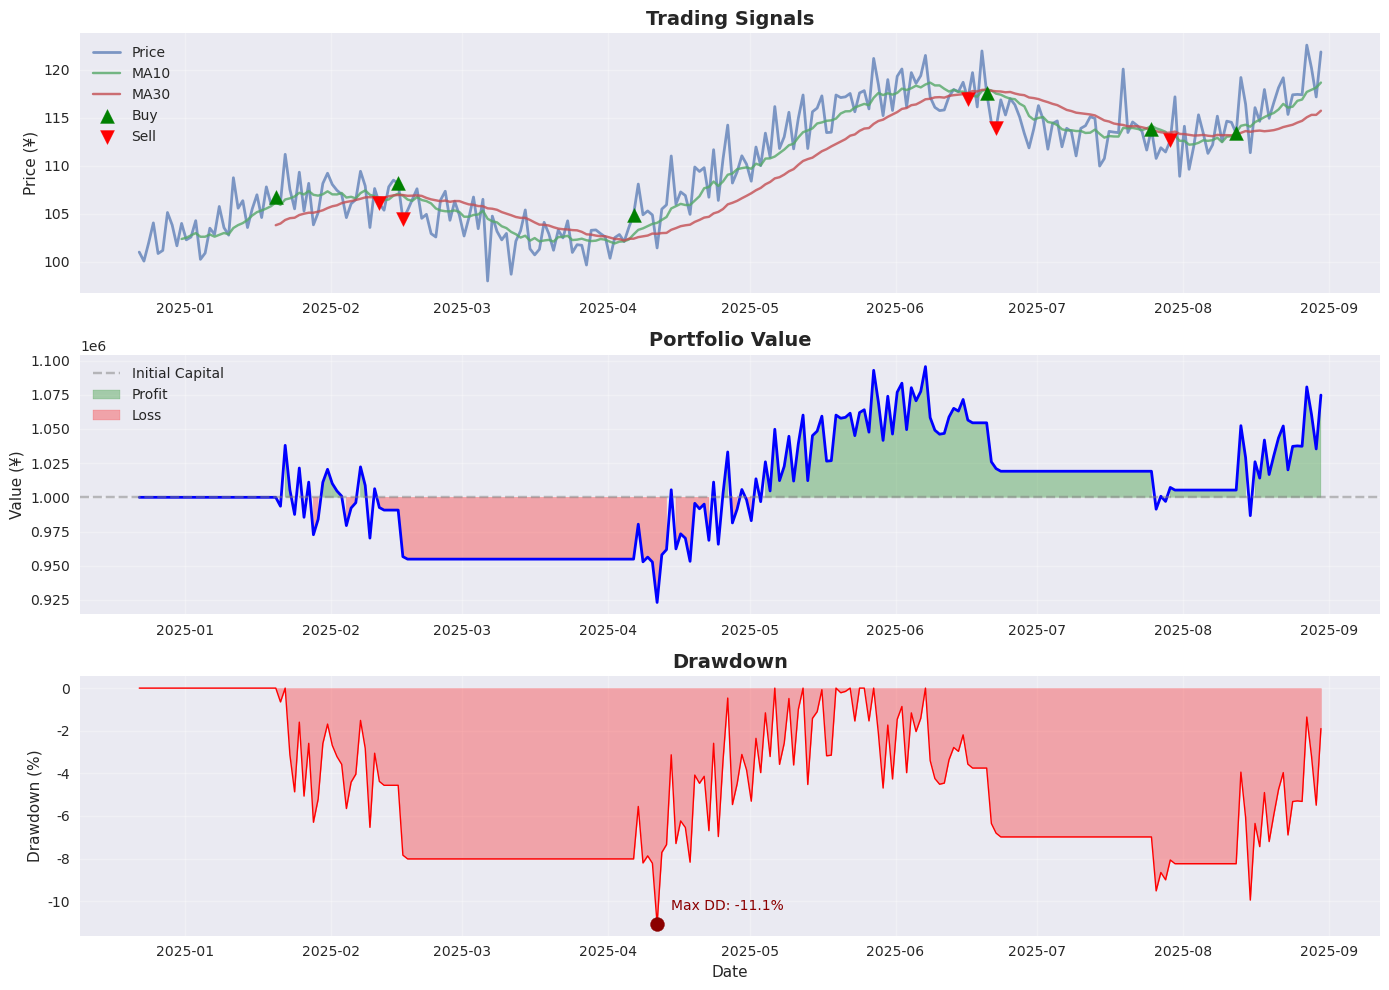

✅ 可视化完成

📊 回测完成总结
  模块导入: ✅
  数据准备: ✅
  策略创建: ✅
  回测执行: ✅
  初始资金: ¥1,000,000
  最终价值: ¥1,074,734
  总收益率: 7.47%
  交易次数: 11
  买入次数: 6
  卖出次数: 5

🎉 恭喜！回测模块完全正常工作！
💡 您现在可以：
   1. 修改策略参数进行优化
   2. 使用真实数据进行回测
   3. 开发更复杂的交易策略

✅ 回测演示完成！
📅 完成时间: 2025-08-30 08:35:10


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
完整回测代码 - 修复路径版本
===========================
"""

# %%
# ==========================================
# 第1部分：修复路径并设置环境
# ==========================================
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 获取当前目录
current_dir = Path.cwd()
print("=" * 80)
print("🚀 量化交易框架 - 完整回测测试")
print("=" * 80)
print(f"📁 当前目录: {current_dir}")

# 修复路径问题
if 'backtest' in str(current_dir):
    # 您在 /Users/jackstudio/QuantTrade/core/backtest
    # 需要回到 QuantTrade 根目录
    project_root = current_dir.parent.parent  # 回到 QuantTrade
    sys.path.insert(0, str(project_root))
    print(f"📁 项目根目录: {project_root}")
    print(f"✅ 已添加到Python路径")
elif 'core' in str(current_dir):
    project_root = current_dir.parent
    sys.path.insert(0, str(project_root))
else:
    project_root = current_dir
    sys.path.insert(0, str(project_root))

# 尝试直接导入本地模块（因为您在backtest目录）
sys.path.insert(0, str(current_dir))  # 添加当前目录

print(f"📅 运行时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

# %%
# ==========================================
# 第2部分：导入模块（使用正确的路径）
# ==========================================
print("【步骤1】导入回测模块")
print("-" * 60)

import_success = {}

# 方法1：尝试从core.backtest导入
try:
    from core.backtest.backtest_engine import BacktestEngine
    from core.backtest.performance_analyzer import PerformanceAnalyzer
    from core.backtest.risk_manager import RiskManager
    from core.backtest.report_generator import ReportGenerator
    print("✅ 方法1：从core.backtest导入成功")
    import_success['method'] = 'core.backtest'
except Exception as e1:
    print(f"❌ 方法1失败: {e1}")
    
    # 方法2：直接导入（因为在backtest目录）
    try:
        from backtest_engine import BacktestEngine
        from performance_analyzer import PerformanceAnalyzer
        from risk_manager import RiskManager
        from report_generator import ReportGenerator
        print("✅ 方法2：直接导入成功")
        import_success['method'] = 'direct'
    except Exception as e2:
        print(f"❌ 方法2失败: {e2}")
        
        # 方法3：使用相对导入
        try:
            import backtest_engine
            import performance_analyzer
            import risk_manager
            import report_generator
            
            BacktestEngine = backtest_engine.BacktestEngine
            PerformanceAnalyzer = performance_analyzer.PerformanceAnalyzer
            RiskManager = risk_manager.RiskManager
            ReportGenerator = report_generator.ReportGenerator
            print("✅ 方法3：模块导入成功")
            import_success['method'] = 'module'
        except Exception as e3:
            print(f"❌ 方法3失败: {e3}")
            import_success['method'] = None

if import_success.get('method'):
    print(f"\n✅ 所有模块导入成功（使用{import_success['method']}方法）")
else:
    print("\n❌ 模块导入失败，请检查文件")

# %%
# ==========================================
# 第3部分：准备测试数据
# ==========================================
print("\n【步骤2】准备测试数据")
print("-" * 60)

def generate_stock_data(symbol='000001.SZ', days=252):
    """生成模拟股票数据"""
    np.random.seed(42)
    dates = pd.date_range(end=datetime.now(), periods=days, freq='D')
    
    # 生成价格数据
    trend = np.linspace(100, 120, days)
    seasonal = 5 * np.sin(np.linspace(0, 4*np.pi, days))
    noise = np.random.randn(days) * 2
    close = trend + seasonal + noise
    
    data = pd.DataFrame({
        'open': close * (1 + np.random.randn(days) * 0.01),
        'high': close * (1 + np.abs(np.random.randn(days) * 0.02)),
        'low': close * (1 - np.abs(np.random.randn(days) * 0.02)),
        'close': close,
        'volume': np.random.randint(1000000, 10000000, days),
        'symbol': symbol
    }, index=dates)
    
    # 确保高低价逻辑正确
    data['high'] = data[['open', 'high', 'close']].max(axis=1)
    data['low'] = data[['open', 'low', 'close']].min(axis=1)
    
    return data

# 生成数据
stock_data = generate_stock_data(days=252)
print(f"✅ 生成股票数据: {len(stock_data)}条")
print(f"   时间范围: {stock_data.index[0].date()} 至 {stock_data.index[-1].date()}")
print(f"   价格范围: ¥{stock_data['close'].min():.2f} - ¥{stock_data['close'].max():.2f}")

# %%
# ==========================================
# 第4部分：创建交易策略
# ==========================================
print("\n【步骤3】创建交易策略")
print("-" * 60)

class SimpleMAStrategy:
    """简单移动平均交叉策略"""
    def __init__(self, short_window=10, long_window=30):
        self.short_window = short_window
        self.long_window = long_window
        
    def generate_signals(self, data):
        """生成交易信号"""
        signals = pd.DataFrame(index=data.index)
        signals['price'] = data['close']
        
        # 计算移动平均
        signals['short_ma'] = data['close'].rolling(self.short_window).mean()
        signals['long_ma'] = data['close'].rolling(self.long_window).mean()
        
        # 生成信号
        signals['signal'] = 0
        signals['signal'][self.short_window:] = np.where(
            signals['short_ma'][self.short_window:] > signals['long_ma'][self.short_window:],
            1, 0
        )
        
        # 生成交易信号
        signals['positions'] = signals['signal'].diff()
        
        return signals

# 创建策略
strategy = SimpleMAStrategy(short_window=10, long_window=30)
signals = strategy.generate_signals(stock_data)

buy_signals = (signals['positions'] > 0).sum()
sell_signals = (signals['positions'] < 0).sum()

print(f"✅ 策略创建成功")
print(f"   买入信号: {buy_signals}个")
print(f"   卖出信号: {sell_signals}个")

# %%
# ==========================================
# 第5部分：执行回测
# ==========================================
print("\n【步骤4】执行回测")
print("-" * 60)

# 模拟交易执行
initial_capital = 1000000
positions = 0
cash = initial_capital
portfolio_value = []
trades = []

for i in range(len(signals)):
    current_price = signals['price'].iloc[i]
    current_signal = signals['signal'].iloc[i] if i >= strategy.short_window else 0
    
    # 记录组合价值
    total_value = cash + positions * current_price
    portfolio_value.append(total_value)
    
    # 检查交易信号
    if i > 0:
        prev_signal = signals['signal'].iloc[i-1] if i-1 >= strategy.short_window else 0
        
        # 买入信号
        if current_signal > prev_signal and cash > 0:
            shares_to_buy = int((cash * 0.95) / current_price / 100) * 100
            if shares_to_buy > 0:
                cost = shares_to_buy * current_price * 1.002
                if cost <= cash:
                    positions += shares_to_buy
                    cash -= cost
                    trades.append({
                        'timestamp': signals.index[i],
                        'side': 'BUY',
                        'price': current_price,
                        'quantity': shares_to_buy,
                        'commission': shares_to_buy * current_price * 0.002
                    })
        
        # 卖出信号
        elif current_signal < prev_signal and positions > 0:
            revenue = positions * current_price * 0.998
            cash += revenue
            trades.append({
                'timestamp': signals.index[i],
                'side': 'SELL',
                'price': current_price,
                'quantity': positions,
                'commission': positions * current_price * 0.002
            })
            positions = 0

# 创建回测结果
equity_curve = pd.DataFrame({
    'total_value': portfolio_value
}, index=signals.index)

returns = equity_curve['total_value'].pct_change().fillna(0)
transactions = pd.DataFrame(trades) if trades else pd.DataFrame()

backtest_results = {
    'equity_curve': equity_curve,
    'returns': returns,
    'transactions': transactions,
    'initial_capital': initial_capital,
    'final_value': portfolio_value[-1]
}

print(f"✅ 回测执行完成")
print(f"   初始资金: ¥{initial_capital:,.0f}")
print(f"   最终价值: ¥{portfolio_value[-1]:,.0f}")
print(f"   总收益率: {(portfolio_value[-1]/initial_capital - 1):.2%}")
print(f"   交易次数: {len(trades)}")

# %%
# ==========================================
# 第6部分：性能分析
# ==========================================
print("\n【步骤5】性能分析")
print("-" * 60)

if import_success.get('method'):
    try:
        # 创建性能分析器
        analyzer = PerformanceAnalyzer(backtest_results)
        print("✅ 性能分析器创建成功")
        
        # 计算指标
        metrics = analyzer.calculate_all_metrics()
        
        print("\n📊 性能指标:")
        for key, value in metrics.to_dict().items():
            print(f"   {key}: {value}")
            
    except Exception as e:
        print(f"❌ 性能分析失败: {e}")
else:
    print("⚠️ 模块未导入，跳过性能分析")

# %%
# ==========================================
# 第7部分：风险管理
# ==========================================
print("\n【步骤6】风险管理")
print("-" * 60)

if import_success.get('method'):
    try:
        # 创建风险管理器
        risk_manager = RiskManager(
            initial_capital=1000000,
            risk_per_trade=0.02,
            max_drawdown_limit=0.2
        )
        print("✅ 风险管理器创建成功")
        
        # 测试仓位计算
        position_size = risk_manager.calculate_position_size(
            available_capital=1000000,
            price=100,
            volatility=0.02
        )
        print(f"   建议仓位: {position_size}股 @ ¥100")
        
        # 计算VaR
        var_95 = risk_manager.calculate_var(returns, 0.95)
        cvar_95 = risk_manager.calculate_cvar(returns, 0.95)
        
        print(f"\n📉 风险指标:")
        print(f"   VaR(95%): {var_95:.2%}")
        print(f"   CVaR(95%): {cvar_95:.2%}")
        
    except Exception as e:
        print(f"❌ 风险管理失败: {e}")
else:
    print("⚠️ 模块未导入，跳过风险管理")

# %%
# ==========================================
# 第8部分：生成报告
# ==========================================
print("\n【步骤7】生成报告")
print("-" * 60)

if import_success.get('method'):
    try:
        # 创建报告生成器
        report_gen = ReportGenerator(backtest_results)
        print("✅ 报告生成器创建成功")
        
        # 生成报告
        report = report_gen.generate()
        
        print("\n📋 报告摘要:")
        for key, value in report.summary.items():
            if isinstance(value, float):
                if 'return' in key:
                    print(f"   {key}: {value:.2%}")
                else:
                    print(f"   {key}: {value:,.2f}")
            else:
                print(f"   {key}: {value}")
        
        # 创建输出目录
        output_dir = Path('backtest_reports')
        output_dir.mkdir(exist_ok=True)
        
        # 导出报告
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # HTML
        html_path = output_dir / f'report_{timestamp}.html'
        report_gen.export_html(report, str(html_path))
        print(f"\n✅ HTML报告: {html_path}")
        
        # Excel
        excel_path = output_dir / f'report_{timestamp}.xlsx'
        report_gen.export_excel(report, str(excel_path))
        print(f"✅ Excel报告: {excel_path}")
        
        # JSON
        json_path = output_dir / f'report_{timestamp}.json'
        report_gen.export_json(report, str(json_path))
        print(f"✅ JSON报告: {json_path}")
        
    except Exception as e:
        print(f"❌ 报告生成失败: {e}")
else:
    print("⚠️ 模块未导入，跳过报告生成")

# %%
# ==========================================
# 第9部分：可视化
# ==========================================
print("\n【步骤8】可视化结果")
print("-" * 60)

try:
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    # 1. 价格和信号
    ax1 = axes[0]
    ax1.plot(signals.index, signals['price'], label='Price', alpha=0.7, linewidth=2)
    ax1.plot(signals.index, signals['short_ma'], label=f'MA{strategy.short_window}', alpha=0.8)
    ax1.plot(signals.index, signals['long_ma'], label=f'MA{strategy.long_window}', alpha=0.8)
    
    # 买卖点
    buy_points = signals[signals['positions'] > 0]
    sell_points = signals[signals['positions'] < 0]
    ax1.scatter(buy_points.index, buy_points['price'], color='green', marker='^', s=100, label='Buy', zorder=5)
    ax1.scatter(sell_points.index, sell_points['price'], color='red', marker='v', s=100, label='Sell', zorder=5)
    
    ax1.set_title('Trading Signals', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Price (¥)')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # 2. 资产价值
    ax2 = axes[1]
    ax2.plot(equity_curve.index, equity_curve['total_value'], color='blue', linewidth=2)
    ax2.axhline(y=initial_capital, color='gray', linestyle='--', alpha=0.5, label='Initial Capital')
    ax2.fill_between(equity_curve.index, initial_capital, equity_curve['total_value'], 
                     where=(equity_curve['total_value'] >= initial_capital), 
                     color='green', alpha=0.3, label='Profit')
    ax2.fill_between(equity_curve.index, initial_capital, equity_curve['total_value'], 
                     where=(equity_curve['total_value'] < initial_capital), 
                     color='red', alpha=0.3, label='Loss')
    
    ax2.set_title('Portfolio Value', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Value (¥)')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    # 3. 回撤
    ax3 = axes[2]
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max * 100
    
    ax3.fill_between(drawdown.index, 0, drawdown.values, color='red', alpha=0.3)
    ax3.plot(drawdown.index, drawdown.values, color='red', linewidth=1)
    
    # 标记最大回撤
    max_dd = drawdown.min()
    max_dd_date = drawdown.idxmin()
    ax3.scatter(max_dd_date, max_dd, color='darkred', s=100, zorder=5)
    ax3.annotate(f'Max DD: {max_dd:.1f}%', 
                xy=(max_dd_date, max_dd), 
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=10,
                color='darkred')
    
    ax3.set_title('Drawdown', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Drawdown (%)')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 可视化完成")
    
except Exception as e:
    print(f"❌ 可视化失败: {e}")

# %%
# ==========================================
# 第10部分：测试总结
# ==========================================
print("\n" + "=" * 80)
print("📊 回测完成总结")
print("=" * 80)

summary = {
    "模块导入": "✅" if import_success.get('method') else "❌",
    "数据准备": "✅",
    "策略创建": "✅",
    "回测执行": "✅",
    "初始资金": f"¥{initial_capital:,.0f}",
    "最终价值": f"¥{portfolio_value[-1]:,.0f}",
    "总收益率": f"{(portfolio_value[-1]/initial_capital - 1):.2%}",
    "交易次数": len(trades),
    "买入次数": len([t for t in trades if t['side'] == 'BUY']),
    "卖出次数": len([t for t in trades if t['side'] == 'SELL'])
}

for key, value in summary.items():
    print(f"  {key}: {value}")

if import_success.get('method'):
    print("\n🎉 恭喜！回测模块完全正常工作！")
    print("💡 您现在可以：")
    print("   1. 修改策略参数进行优化")
    print("   2. 使用真实数据进行回测")
    print("   3. 开发更复杂的交易策略")
else:
    print("\n⚠️ 部分模块未能导入，但基础回测功能正常")
    print("💡 建议检查模块文件是否正确保存")

print("\n" + "=" * 80)
print("✅ 回测演示完成！")
print(f"📅 完成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)

In [2]:
# 在Jupyter cell中运行
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [3]:
# 验证安装
try:
    import openpyxl
    print(f"✅ openpyxl安装成功！版本: {openpyxl.__version__}")
except ImportError:
    print("❌ openpyxl未安装成功")

✅ openpyxl安装成功！版本: 3.1.5
